In [ ]:
# Installing libraries

!pip install openai==0.28
!pip install edgartools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.75.0
    Uninstalling openai-1.75.0:
      Successfully uninstalled openai-1.75.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 19.5 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
import openai
import numpy as np
import httpx
import pandas as pd
from typing import List, Dict
import chardet
from edgar import *

# Data collection

In [ ]:
# Function uses the yfinance library to download historical stock price data from Yahoo Finance
def get_stock_data(tickers: list[str], start_date: str, end_date: str) -> dict[str, pd.DataFrame]:
    """
    Gets historical stock data from Yahoo Finance.
    """
    try:
        historical_data = {}
        for ticker in tickers:

          data = yf.download(ticker, start=start_date, end=end_date)
          historical_data[ticker] = data

        return historical_data
    except Exception as e:
        print(f"Error getting stock data for {ticker}: {e}")
        return None

# Function uses the News API to get the latest news about a particular ticker
def get_financial_news(tickers: List[str], api_key: str, start_date: str, end_date: str) -> Dict[str, pd.DataFrame]:
    """
    Gets financial news articles from News API with automatic encoding detection.
    """
    news_data = {}

    for ticker in tickers:
        url = f"https://newsapi.org/v2/everything?q={ticker}&from={start_date}&to={end_date}&sortBy=publishedAt&apiKey={api_key}"

        try:
            response = requests.get(url)
            response.raise_for_status()

            # Detect encoding
            encoding = chardet.detect(response.content)['encoding']
            response.encoding = encoding if encoding else 'utf-8'

            articles = response.json().get('articles', [])

            df = pd.DataFrame([{
                'title': a.get('title', ''),
                'content': a.get('content', ''),
                'publishedAt': pd.to_datetime(a.get('publishedAt', '')),
                'source': a.get('source', {}).get('name', '')
            } for a in articles if a.get('content')])

            news_data[ticker] = df

        except requests.exceptions.RequestException as e:
            print(f"HTTP Error for {ticker}: {e}")
        except UnicodeDecodeError:
            print(f"Encoding error for {ticker}, trying fallback...")
            try:
                response.encoding = 'latin-1'
                articles = response.json().get('articles', [])
                # ... rest of processing ...
            except Exception as e:
                print(f"Fallback failed for {ticker}: {e}")
        except Exception as e:
            print(f"General error for {ticker}: {e}")

    return news_data

# Function uses the edgartools library to download company form 10-Q, 10-K from SEC
def get_filings_data(tickers: list[str], start_date: str, end_date: str) -> dict[str, pd.DataFrame]:
    """
    Gets 10-Q/ 10-K forms from SEC.
    """
    # 2. Tell the SEC who you are
    set_identity("mike@indigo.com")

    try:
        filing_data = {}
        for ticker in tickers:

          filings_10_q = Company(ticker).get_filings(form="10-Q", date=f"{start_date}:{end_date}")
          filings_10_k = Company(ticker).get_filings(form="10-K", date=f"{start_date}:{end_date}")

          filing_data[ticker] = {
                                  "10-K": pd.DataFrame(filings_10_k),
                                  "10-Q": pd.DataFrame(filings_10_q)
                                }

        return filing_data
    except Exception as e:
        print(f"Error getting stock data for {ticker}: {e}")
        return None


# def get_earnings_call_transcript(ticker: str) -> str:
#     """
#     Scrapes earnings call transcripts from a website (example: Seeking Alpha).
#     This is a simplified example and might need adjustments based on the website structure.
#     Returns raw text.
#     """
#     url = f"https://seekingalpha.com/symbol/{ticker}/earnings/transcripts"  # Example URL structure
#     try:
#         response = requests.get(url)
#         response.raise_for_status()
#         soup = BeautifulSoup(response.content, 'html.parser')

#         # Example: Find the transcript content (adjust based on actual HTML structure)
#         transcript_div = soup.find('div', class_='article-body')  # Replace with actual class
#         if transcript_div:
#             transcript = transcript_div.get_text(separator='\n', strip=True)
#             return transcript
#         else:
#             return "Transcript not found on the page."

#     except requests.exceptions.RequestException as e:
#         print(f"Error getting earnings call transcript for {ticker}: {e}")
#         return "Error fetching transcript."
#     except Exception as e:
#         print(f"Error processing earnings call transcript for {ticker}: {e}")
#         return "Error processing transcript."

In [ ]:
all_stocks = ["META", "PFE", "JPM", "TSLA", "XOM", "GS", "BA", "C", "CVX", "MRNA", "GM", "F", "AAPL", "MS",
               "AAL", "BAC", "NVDA", "JNJ", "WMT", "AMZN", "DIS", "MSFT", "INTC", "DAL", "WFC", "MRK", "BLK", "GOOG",
               "UAL", "UBER", "BX", "COIN", "NFLX", "NIO", "BKR", "T", "AMD", "LLY", "OXY", "LUV", "LMT"]

# start_date = "2022-01-03"
# end_date = "2022-06-10"

start_date = "2025-03-22"
end_date = "2025-04-22"

news_api_key = "API_KEY"

openai.api_key = "API_KEY"

In [ ]:
# Get stock prices from Yahoo Finance
stock_prices = get_stock_data(all_stocks, start_date, end_date)
# print(stock_prices)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

HTTP Error for META: 426 Client Error: Upgrade Required for url: https://newsapi.org/v2/everything?q=META&from=2025-03-22&to=2025-04-22&sortBy=publishedAt&apiKey=4c9e81450e18475eb7c580cf2e64f2d3
HTTP Error for PFE: 426 Client Error: Upgrade Required for url: https://newsapi.org/v2/everything?q=PFE&from=2025-03-22&to=2025-04-22&sortBy=publishedAt&apiKey=4c9e81450e18475eb7c580cf2e64f2d3
HTTP Error for JPM: 426 Client Error: Upgrade Required for url: https://newsapi.org/v2/everything?q=JPM&from=2025-03-22&to=2025-04-22&sortBy=publishedAt&apiKey=4c9e81450e18475eb7c580cf2e64f2d3
HTTP Error for TSLA: 426 Client Error: Upgrade Required for url: https://newsapi.org/v2/everything?q=TSLA&from=2025-03-22&to=2025-04-22&sortBy=publishedAt&apiKey=4c9e81450e18475eb7c580cf2e64f2d3
HTTP Error for XOM: 426 Client Error: Upgrade Required for url: https://newsapi.org/v2/everything?q=XOM&from=2025-03-22&to=2025-04-22&sortBy=publishedAt&apiKey=4c9e81450e18475eb7c580cf2e64f2d3
HTTP Error for GS: 426 Client E

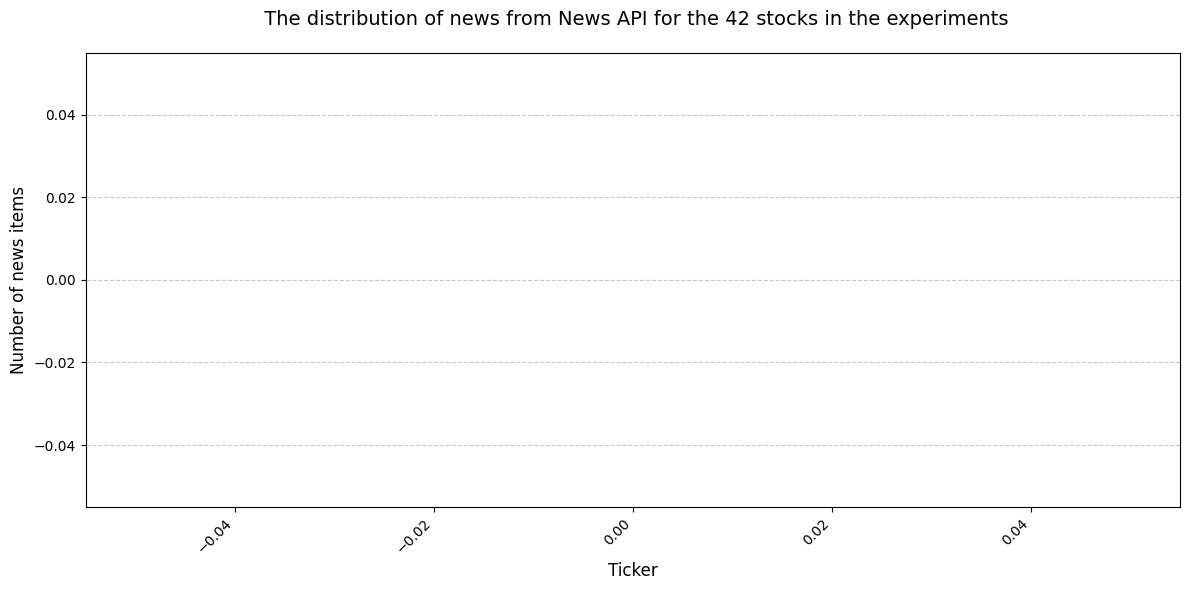

In [ ]:
# Financial news of all (42) stocks

import json
import matplotlib.pyplot as plt
import pandas as pd

# Get financial news from NewAPI (Alpaca News, Refinit Real-time news in article)
financial_news = get_financial_news(all_stocks, news_api_key, start_date, end_date)
# print(financial_news)

#  Plot the distribution of news from REFINITIV REAL-TIME NEWS for the 42 stocks in the experiments
def plot_news_distribution(news_dict: dict):

    # Data preparation
    counts = {}
    for ticker, df in news_dict.items():
        if df is not None and not df.empty:
            counts[ticker] = len(df['content'])

    # Sort by descending number of news items
    sorted_counts = dict(sorted(counts.items(), key=lambda x: x[1], reverse=True))

    # Creating a graph
    plt.figure(figsize=(12, 6))
    plt.bar(sorted_counts.keys(), sorted_counts.values(), color='steelblue')

    # Setting up the layout
    plt.title(' The distribution of news from News API for the 42 stocks in the experiments', fontsize=14, pad=20)
    plt.xlabel('Ticker', fontsize=12)
    plt.ylabel('Number of news items', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adding values to columns
    for i, (ticker, count) in enumerate(sorted_counts.items()):
        plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

plot_news_distribution(financial_news)


# Save collected financial news to json file
financial_news_json = financial_news.copy()
for key in financial_news.keys():
  financial_news_json[key] = financial_news[key].to_json()

with open('financial_news.json', 'w') as file:
  json.dump(financial_news_json, file)

<Figure size 1200x600 with 0 Axes>

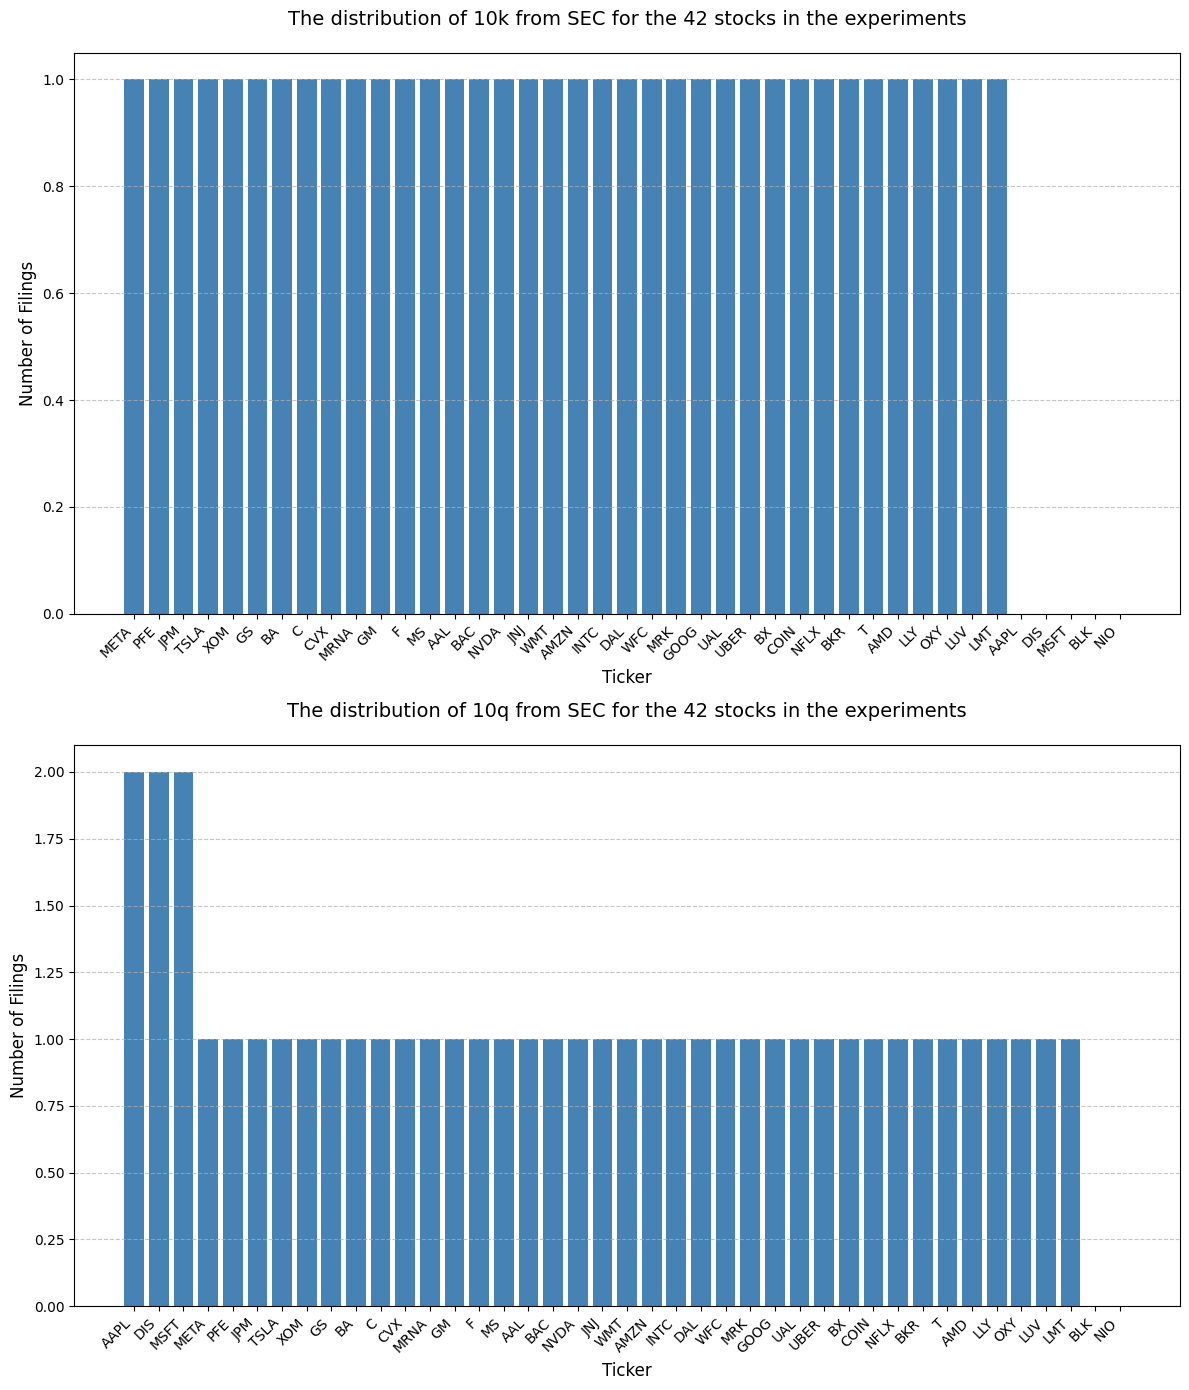

In [ ]:
# 10-Q, 10-K Company Forms of all (42) stocks

start_date = "2022-01-03"
end_date = "2022-06-10"

# Get 10-Q, 10-K Company Forms from SEC
filing_data = get_filings_data(all_stocks, start_date, end_date)
# print(filing_data)

#  Plot the distribution of 10k10q from Securities and Exchange Commission (SEC) for the 42 stocks in the experiments
def plot_filing_distribution(filing_dict: dict):
    """
    Строит столбчатую диаграмму распределения новостей по тикерам

    Параметры:
    news_dict (dict): Словарь формата {тикер: DataFrame с новостями}
    """
    # Подготовка данных
    counts_10_K = {}
    counts_10_Q = {}
    for ticker, dict_q_k in filing_dict.items():
        # if dict_q_k['10-K'] is not None and not dict_q_k['10-K'].empty:
        counts_10_K[ticker] = len(dict_q_k['10-K'])

        # if dict_q_k['10-Q'] is not None and not dict_q_k['10-Q'].empty:
        counts_10_Q[ticker] = len(dict_q_k['10-Q'])

    # Сортировка по убыванию количества новостей
    sorted_counts_10_K = dict(sorted(counts_10_K.items(), key=lambda x: x[1], reverse=True))
    sorted_counts_10_Q = dict(sorted(counts_10_Q.items(), key=lambda x: x[1], reverse=True))

    # Создание графика
    plt.figure(figsize=(12, 6))
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 14))
    plt.sca(ax[0])
    plt.bar(sorted_counts_10_K.keys(), sorted_counts_10_K.values(), color='steelblue')
    plt.title('The distribution of 10k from SEC for the 42 stocks in the experiments', fontsize=14, pad=20)
    plt.xlabel('Ticker', fontsize=12)
    plt.ylabel('Number of Filings', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.sca(ax[1])
    plt.bar(sorted_counts_10_Q.keys(), sorted_counts_10_Q.values(), color='steelblue')
    plt.title('The distribution of 10q from SEC for the 42 stocks in the experiments', fontsize=14, pad=20)
    plt.xlabel('Ticker', fontsize=12)
    plt.ylabel('Number of Filings', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # # Добавление значений на столбцы
    # for i, (ticker, count) in enumerate(sorted_counts_10_K.items()):
    #     plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

plot_filing_distribution(filing_data)


# # Save collected filing_data to json file ????
# filing_data_json = filing_data.copy()
# for key in filing_data.keys():
#   for sec_key in filing_data[key]:
#     filing_data_json[key][sec_key] = filing_data[key][sec_key].to_json()

# with open('filing_data.json', 'w') as file:
#   json.dump(filing_data_json, file)

In [ ]:
# Zacks Equity Research
# IR_reports =

In [ ]:
# ECC
# ECC_audio_records =

# Agents

In [ ]:
# Agent classes

MODEL_NAME = "gpt-3.5-turbo-instruct"

class AnalystAgent:
    """
    Base class for analyst agents.
    """
    def __init__(self, name: str, description: str):
        self.name = name
        self.description = description

    def analyze(self, data: any) -> str:
        """
        Analyzes the given data and returns insights.
        This method should be overridden by subclasses.
        """
        raise NotImplementedError("Subclasses must implement the analyze method")


class StockSelectionAnalyst(AnalystAgent):
    """
    Oversees portfolio selection and applies risk diversification methods.
    """
    def __init__(self):
        super().__init__(name="StockSelectionAnalyst",
                         description="Oversees portfolio selection using risk diversification methods.")

    def analyze(self, stock_data: dict[str, pd.DataFrame]) -> str:
        """
        Selects stocks for the portfolio based on risk diversification.
        """
        try:
            # For simplicity, select top 5 stocks with lowest volatility
            volatilities = {ticker: float(data['Close'].pct_change().std().iloc[0]) for ticker, data in stock_data.items()}
            sorted_stocks = sorted(volatilities.items(), key=lambda x: x[1])
            selected_stocks = [ticker for ticker, _ in sorted_stocks[:5]]

            # For simplicity, select top 3 stocks with lowest volatility
            # volatilities = {ticker: data['Close'].pct_change().std() for ticker, data in stock_data.items()}
            # sorted_stocks = sorted(volatilities.items(), key=lambda x: x[1])
            # selected_stocks = [ticker for ticker, _ in sorted_stocks[:3]]

            # return f"Selected stocks: {', '.join(selected_stocks)}"
            return selected_stocks
        except Exception as e:
            print(f"Error selecting stocks: {e}")
            return "Stock selection failed."

class DataAnalysisAnalyst(AnalystAgent):
    """
    Computes financial metrics from tabular time series data.
    """
    def __init__(self):
        super().__init__(name="DataAnalysisAnalyst",
                         description="Computes financial metrics from tabular time series data.")


    def calculate_cvar(self, returns: pd.Series, alpha: float = 0.05) -> float:
        """
        Calculates the Conditional Value at Risk (CVaR).
        """
        var = np.percentile(returns, alpha * 100)
        cvar = returns[returns <= var].mean()
        return cvar

    def analyze(self, time_series_data: dict[str, pd.DataFrame]) -> dict:
        """
        Computes momentum and CVaR from the time series data.
        """
        try:
            momentum = {}
            # returns = {}
            cvar = {}
            time_series_data = stock_prices
            for ticker, data in time_series_data.items():
                if len(data['Close']) > 0:
                  momentum_one_ticker =  float(data['Close'].iloc[-1].iloc[0]) / float(data['Close'].iloc[-20].iloc[0]) - 1.0
                  momentum.update([(ticker, momentum_one_ticker)])

                  returns_one_ticker = data['Close'].pct_change().dropna()
                  cvar_one_ticker = float(self.calculate_cvar(returns_one_ticker, alpha=0.05).iloc[0])
                  cvar.update([(ticker, cvar_one_ticker)])

                elif len(data['Close']) == 0:
                  pass

            # Calculate momentum (example: 3-month momentum)
            # momentum = {ticker: (data['Close'].iloc[-1] / data['Close'].iloc[-60] - 1) for ticker, data in time_series_data.items()}
            # momentum = time_series_data['Close'].iloc[-1] / time_series_data['Close'].iloc[-60] - 1  # Roughly 3 months

            # Calculate CVaR (Conditional Value at Risk)

            # returns = time_series_data['Close'].pct_change().dropna()
            # cvar = self.calculate_cvar(returns, alpha=0.05)

            # return f"Momentum: {momentum:.4f}, CVaR (95%): {cvar:.4f}"
            return momentum, cvar

        except Exception as e:
            print(f"Error analyzing time series data: {e}")
            return "Data analysis failed."

class NewsSentimentAnalyst(AnalystAgent):
    """
    Analyzes news articles and extracts insights and sentiment.
    """
    def __init__(self):
        super().__init__(name="NewsSentimentAnalyst",
                         description="Extracts insights and sentiment from news articles.")

    def analyze(self, news: dict[str, pd.DataFrame]) -> dict:
          """
          Analyzes the news article, extracts insights and sentiments from daily news
          and returns the insights and sentiment.
          """

          insights = {}
          sentiment = {}
          print(news.keys())

          for ticker, data in news.items():
            # print(ticker)
            insights_one_ticker = []
            sentiment_one_ticker = []
            for row_idx in range(data['content'].shape[0]):
            # for row_idx in range(5):
                news_article = data['content'].iloc[row_idx]

                response_insights = openai.Completion.create(
                    engine="gpt-3.5-turbo-instruct",
                    prompt=f"You are the investment analysts for news. Your responsibilities are to distill investment insights and other indicators like financial sentiment for {ticker}. Extract insights from this news article\n\n{news_article}\n",
                    max_tokens=50,
                    n=1,
                    stop=None,
                    temperature=0.2,
                )

                # chat = client.chat.completions.create(
                #     model="gpt-3.5-turbo",
                #     messages=[ {"role": "user", "content": f"You are the investment analysts for news. Your responsibilities are to distill investment insights and other indicators like financial sentiment for {ticker}. Extract insights from this news article\n\n{news_article}\n"} ]
                #     )

                insights_one_ticker_one_row = response_insights.choices[0].text.strip()
                insights_one_ticker.append(insights_one_ticker_one_row)

                response_sentiment = openai.Completion.create(
                    engine="gpt-3.5-turbo-instruct",
                    prompt=f"You are the investment analysts for news. Your responsibilities are to distill investment insights and other indicators like financial sentiment for {ticker}. What is the sentiment (positive, negative, or neutral) of this news article?\n\n{news_article}\n",
                    max_tokens=50,
                    n=1,
                    stop=None,
                    temperature=0.2,
                )
                sentiment_one_ticker_one_row = response_sentiment.choices[0].text.strip()
                sentiment_one_ticker.append(sentiment_one_ticker_one_row)

            insights_one_ticker = pd.DataFrame(insights_one_ticker)
            insights.update([(ticker, insights_one_ticker)])

            sentiment_one_ticker = pd.DataFrame(sentiment_one_ticker)
            sentiment.update([(ticker, sentiment_one_ticker)])

          return insights, sentiment

class FilingDataAnalyst(AnalystAgent):
    """
    Analyzes 10-Q/10-K filings and extracts key information.
    """
    def __init__(self):
        self.name = "FilingAnalysisAgent"
        self.description = "Extracts key information from 10-Q/10-K filings using LLMs."

    def analyze(self, filing_text: dict[str, pd.DataFrame]) -> Dict[str, str]:
        """
        Analyzes the filing text and returns key information in a dictionary.
        """
        try:

            insights = {}
            for key in filing_data.keys():

              filing_text_10_k = filing_data[key]["10-K"][0][0].markdown()
              revenue_10_k = self.extract_financial_metric(filing_text_10_k, "Revenue")
              net_income_10_k = self.extract_financial_metric(filing_text_10_k, "Net Income")
              management_discussion_10_k = self.extract_management_discussion(filing_text_10_k)
              risk_factors_10_k = self.extract_risk_factors(filing_text_10_k)

              insights[key]["10-K"] = {
                                          "Revenue": revenue_10_k,
                                          "Net Income": net_income_10_k,
                                          "Management Discussion": management_discussion_10_k,
                                          "Risk Factors": risk_factors_10_k,
                                        }

              if len(filing_data[key]["10-Q"]) == 1:

                filing_text_10_q = filing_data[key]["10-Q"][0][0].markdown()
                revenue_10_q = self.extract_financial_metric(filing_text_10_q, "Revenue")
                net_income_10_q = self.extract_financial_metric(filing_text_10_k, "Net Income")
                management_discussion_10_q = self.extract_management_discussion(filing_text_10_q)
                risk_factors_10_q = self.extract_risk_factors(filing_text_10_q)

                insights[key]["10-Q"] = {
                                          "Revenue": revenue_10_q,
                                          "Net Income": net_income_10_q,
                                          "Management Discussion": management_discussion_10_q,
                                          "Risk Factors": risk_factors_10_q,
                                        }

              elif len(filing_data[key]["10-Q"]) > 1:
                  for i in len(filing_data[key]["10-Q"]):
                    filing_text_10_k = filing_data[key]["10-Q"][i][0].markdown()
                    revenue_10_q = self.extract_financial_metric(filing_text_10_q, "Revenue")
                    net_income_10_q = self.extract_financial_metric(filing_text_10_k, "Net Income")
                    management_discussion_10_q = self.extract_management_discussion(filing_text_10_q)
                    risk_factors_10_q = self.extract_risk_factors(filing_text_10_q)

                    insights[key]["10-Q"][i] = {
                                                  "Revenue": revenue_10_k,
                                                  "Net Income": net_income_10_k,
                                                  "Management Discussion": management_discussion_10_k,
                                                  "Risk Factors": risk_factors_10_k,
                                                }

            return insights

        except Exception as e:
            print(f"Error analyzing filing: {e}")
            return {}


    def extract_financial_metric(self, filing_text: str, metric_name: str) -> str:
            """
            Extracts a specific financial metric from the filing text using LLMs.
            """
            try:
                response = openai.Completion.create(
                    model=MODEL_NAME,
                    prompt=f"Extract the value of {metric_name} from the following financial report:\n\n{filing_text}\n\nValue:",
                    max_tokens=50,
                    n=1,
                    stop=None,
                    temperature=0.3,
                )
                return response.choices[0].text.strip()
            except Exception as e:
                print(f"Error extracting {metric_name}: {e}")
                return "N/A"

    def extract_management_discussion(self, filing_text: str) -> str:
          """
          Extracts key points from the Management Discussion and Analysis (MD&A) section.
          """
          try:
              response = openai.Completion.create(
                  model=MODEL_NAME,
                  prompt=f"Summarize the key points from the Management Discussion and Analysis (MD&A) section of the following financial report:\n\n{filing_text}\n\nSummary:",
                  max_tokens=200,
                  n=1,
                  stop=None,
                  temperature=0.4,
              )
              return response.choices[0].text.strip()
          except Exception as e:
              print(f"Error extracting MD&A: {e}")
              return "N/A"

    def extract_risk_factors(self, filing_text: str) -> str:
        """
        Identifies and lists the key risk factors discussed in the filing.
        """
        try:
            response = openai.Completion.create(
                model=MODEL_NAME,
                prompt=f"List the key risk factors discussed in the following financial report:\n\n{filing_text}\n\nRisk Factors:",
                max_tokens=150,
                n=1,
                stop=None,
                temperature=0.3,
            )
            return response.choices[0].text.strip()
        except Exception as e:
            print(f"Error extracting risk factors: {e}")
            return "N/A"

  #  class EarningsCallAnalyst(AnalystAgent):
  #   """
  #   Analyzes earnings call transcripts and extracts investment signals.
  #   """
  #   def __init__(self):
  #       super().__init__(name="EarningsCallAnalyst",
  #                        description="Interprets investment signals from earnings call recordings.")

  #   def analyze(self, earnings_call_transcript: str) -> str:
  #       """
  #       Analyzes the earnings call transcript and returns investment signals.
  #       """
  #       try:
  #           response = openai.Completion.create(
  #               engine="text-davinci-003",
  #               prompt=f"Identify potential investment signals (positive or negative) from the following earnings call transcript:\n\n{earnings_call_transcript}\n\nInvestment Signals:",
  #               max_tokens=100,
  #               n=1,
  #               stop=None,
  #               temperature=0.3,
  #           )
  #           signals = response.choices[0].text.strip()
  #           return f"Earnings call signals: {signals}"
  #       except Exception as e:
  #           print(f"Error analyzing earnings call: {e}")
  #           return "Earnings call analysis failed."


In [ ]:
import scipy.optimize as sco

class ManagerAgent:
    """
    The manager agent responsible for making trading decisions.
    """
    def __init__(self):
        self.analysts = {
            "data_analysis": DataAnalysisAnalyst(),
            "financial_news": NewsSentimentAnalyst(),
            "filing_data": FilingDataAnalyst(),
            # "financial_report": FinancialReportAnalyst(),
            # "earnings_call": EarningsCallAnalyst(),
            "stock_selection": StockSelectionAnalyst()
        }
        self.investment_beliefs = {}  # Store beliefs about information sources


    def consolidate_insights(self, insights: List[str]) -> str:
        """
        Consolidates insights from multiple analyst agents.
        """
        return "\n".join(insights)

    def make_trading_decision(self, consolidated_insights: str, risk_alerts: str = "") -> str:
        """
        Makes a trading decision based on consolidated insights and risk alerts.
        """
        prompt = f"Based on the following insights and risk alerts, what trading decision should be made (buy, sell, or hold)?\n\nInsights:\n{consolidated_insights}\n\nRisk Alerts:\n{risk_alerts}\n\nDecision:"

        try:
            response = openai.Completion.create(
                engine=MODEL_NAME,
                prompt=prompt,
                max_tokens=50,
                n=1,
                stop=None,
                temperature=0.4,
            )
            decision = response.choices[0].text.strip()
            return decision
        except Exception as e:
            print(f"Error making trading decision: {e}")
            return "Unable to make trading decision."

    def calculate_portfolio_weights(self, expected_returns: pd.Series, covariance_matrix: pd.DataFrame, trading_decisions: Dict[str, str]) -> np.ndarray:
        """
        Calculates portfolio weights using mean-variance optimization.
        """
        num_assets = len(expected_returns)

        def objective_function(weights, expected_returns, covariance_matrix):
            portfolio_return = np.sum(expected_returns * weights)
            portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
            # Sharpe ratio with a negative sign (we want to minimize the negative Sharpe ratio)
            return -portfolio_return / portfolio_volatility

        # Initial weights (equal allocation)
        initial_weights = np.array([1/num_assets] * num_assets)

        # Constraints based on trading decisions
        constraints = []
        bounds = []

        for i, ticker in enumerate(expected_returns.index):
            decision = trading_decisions.get(ticker, "hold").lower()

            if decision == "buy":
                bounds.append((0, 1))  # Weight between 0 and 1
            elif decision == "sell":
                bounds.append((-1, 0)) # Weight between -1 and 0 (short selling)
            else:  # hold
                bounds.append((0, 0))  # Weight must be 0

            # Constraint: Sum of weights must be 1 (or close to 1) for buy/sell
            constraints.append({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

        # Optimization
        options = {'maxiter': 1000}
        result = sco.minimize(objective_function, initial_weights, args=(expected_returns, covariance_matrix),
                                method='SLSQP', bounds=bounds, constraints=constraints, options=options)

        if result.success:
            return result.x
        else:
            print("Optimization failed:", result.message)
            return initial_weights  # Return initial weights if optimization fails


    def refine_investment_beliefs(self, outcome: float, insights: List[str], decision: str):
        """
        Refines investment beliefs based on the outcome of the trading decision.
        """
        for insight in insights:
            if insight not in self.investment_beliefs:
                self.investment_beliefs[insight] = {"correct": 0, "incorrect": 0}

            if (outcome > 0 and decision == "buy") or (outcome < 0 and decision == "sell"):
                self.investment_beliefs[insight]["correct"] += 1
            else:
                self.investment_beliefs[insight]["incorrect"] += 1

    def self_reflect(self, previous_decisions: List[tuple[str, str, float]]) -> str:
        """
        Conducts self-reflection by reviewing reasoning outcomes from previous trading actions.
        """
        reflection = "Reviewing previous trading decisions:\n"
        for i, (insights, decision, outcome) in enumerate(previous_decisions):
            reflection += f"Decision {i + 1}: Insights - {insights}, Decision - {decision}, Outcome - {outcome}\n"
            if (outcome > 0 and decision == "buy") or (outcome < 0 and decision == "sell"):
                reflection += "This was a good decision.\n"
            else:
                reflection += "This was a bad decision.\n"
        return reflection

In [ ]:
# Agents' initiation

# 1) Stock selection agent (compute momentum and CVaR,
# oversees portfolio selection by applying the classic risk diversification method in quantitative finance)
stock_selection_agent = StockSelectionAnalyst()
select_stocks_labels = stock_selection_agent.analyze(stock_prices)
print(f"Selected stocks: {select_stocks_labels}")

# Get financial news for selected stocks from News API (Alpaca News, Refinit Real-time news)
# financial_news = get_financial_news(select_stocks_labels, news_api_key, start_date, end_date)
# print(financial_news)

# Get 10-Q, 10-K Company Forms from SEC for selected stocks
# filing_data = get_filings_data(select_stocks_labels, start_date, end_date)

select_stocks = {}
for key in stock_prices.keys():
  if key in select_stocks_labels:
    select_stocks.update([(key, stock_prices[key])])

# 2) Data agent (compute momentum and CVaR)
data_agent = DataAnalysisAnalyst()
momentums, cvars = data_agent.analyze(select_stocks)
print(f"Momentums: {momentums},\n CVaRs (95%): {cvars}")

# 3) News agent (extract insights and sentiments from daily news)
news_agent = NewsSentimentAnalyst()
insights_news, sentiment_news = news_agent.analyze(financial_news)
print(f"Insights: {insights_news},\n Sentiments: {sentiment_news}")

# 4) 10-Q/ 10-K Filing agent (extract insights and sentiments from forms)
filing_agent = FilingDataAnalyst()
filing_agent.analyze(filing_data)


# 5) Analyst reports agent (extract insights and sentiments from financial reports)

# 6) ECC agent (uses the Whisper API to interpret investment signals from earnings call recordings)

Selected stocks: ['LMT', 'T', 'PFE', 'JNJ', 'MRK']
Momentums: {'META': -0.21683764598483635, 'PFE': -0.15684768821168038, 'JPM': -0.07119055928702123, 'TSLA': -0.18280114936127834, 'XOM': -0.09024183335268132, 'GS': -0.13573520694401453, 'BA': -0.11918185896087385, 'C': -0.1532955449550526, 'CVX': -0.18961342706827, 'MRNA': -0.2645595403161164, 'GM': -0.1373882592422644, 'F': -0.07609753492401872, 'AAPL': -0.12490369500781884, 'MS': -0.14460444255843008, 'AAL': -0.23330517723428645, 'BAC': -0.14279084210483428, 'NVDA': -0.20179556264724963, 'JNJ': -0.039010321385863245, 'WMT': 0.05623506593291694, 'AMZN': -0.17681781045904965, 'DIS': -0.16150928584435076, 'MSFT': -0.08639460826081713, 'INTC': -0.22213044233243073, 'DAL': -0.19251226763066331, 'WFC': -0.13826059251267564, 'MRK': -0.15664607807289965, 'BLK': -0.11364815775817327, 'GOOG': -0.11810741440872252, 'UAL': -0.18598850588267968, 'UBER': -0.04692202152723701, 'BX': -0.20949500412121747, 'COIN': -0.13810083832409126, 'NFLX': 0.016

{}

In [ ]:
# 3. Risk Control Component
# -----------------------------------------------------------------------------

class RiskControlComponent:
    """
    Manages risk at two levels: within-episode and over-episode.
    """
    def __init__(self):
        self.investment_beliefs = {}  # Store beliefs about information sources

    def detect_market_risk(self, portfolio_returns: pd.Series, cvar_threshold: float = -0.02) -> str:
        """
        Detects market risk within a single episode using CVaR.
        """
        cvar = self.calculate_cvar(portfolio_returns)
        if cvar < cvar_threshold:
            return f"High market risk detected (CVaR = {cvar:.4f}). Consider reducing exposure."
        else:
            return "Market risk is within acceptable limits."

    def calculate_cvar(self, returns: pd.Series, alpha: float = 0.05) -> float:
        """
        Calculates the Conditional Value at Risk (CVaR).
        """
        var = np.percentile(returns, alpha * 100)
        cvar = returns[returns <= var].mean()
        return cvar

    def update_investment_beliefs(self, outcome: float, insights: List[str], decision: str):
        """
        Updates investment beliefs based on reasoning trajectories and PnL trends.
        """
        for insight in insights:
            if insight not in self.investment_beliefs:
                self.investment_beliefs[insight] = {"correct": 0, "incorrect": 0}

            if (outcome > 0 and decision == "buy") or (outcome < 0 and decision == "sell"):
                self.investment_beliefs[insight]["correct"] += 1
            else:
                self.investment_beliefs[insight]["incorrect"] += 1

    def provide_prompt_optimization_guidance(self) -> str:
        """
        Provides prompt optimization guidance based on updated investment beliefs.
        """
        if not self.investment_beliefs:
            return "No investment beliefs to provide guidance."

        guidance = "Based on recent performance, consider the following:\n"
        for insight, counts in self.investment_beliefs.items():
            correct_ratio = counts["correct"] / (counts["correct"] + counts["incorrect"] + 1e-9)
            if correct_ratio > 0.7:
                guidance += f"- Emphasize insights from '{insight}' as they have been reliable.\n"
            elif correct_ratio < 0.3:
                guidance += f"- De-emphasize insights from '{insight}' as they have been unreliable.\n"
        return guidance

In [ ]:
def simulate_trading(manager: ManagerAgent, risk_control: RiskControlComponent, historical_data: Dict[str, pd.DataFrame], news_articles: Dict[str, List[str]], financial_reports: Dict[str, List[str]], earnings_call_transcripts: Dict[str, List[str]], num_episodes: int = 10) -> None:
    """
    Simulates the trading process over a series of episodes.
    """
    previous_decisions = []
    all_portfolio_returns = pd.Series()

    for episode in range(num_episodes):
        print(f"Starting Episode {episode + 1}/{num_episodes}")

        # Simulate a trading day (using the last day of available data for simplicity)
        trading_day = historical_data[list(historical_data.keys())[0]].index[-1]
        print(f"Trading Day: {trading_day}")

        # 1. Analyst Insights
        insights = []
        trading_decisions = {}

        # --- News Analysis ---
        for ticker, articles in news_articles.items():
            if articles:
                news_analysis = manager.analysts["news"].analyze(articles[-1])  # Analyze the latest article
                insights.append(f"{ticker} - {news_analysis}")

        # --- Financial Report Analysis ---
        for ticker, reports in financial_reports.items():
            if reports:
                report_analysis = manager.analysts["financial_report"].analyze(reports[-1])  # Analyze the latest report
                insights.append(f"{ticker} - {report_analysis}")

        # --- Earnings Call Analysis ---
        for ticker, transcripts in earnings_call_transcripts.items():
            if transcripts:
                earnings_analysis = manager.analysts["earnings_call"].analyze(transcripts[-1])  # Analyze the latest transcript
                insights.append(f"{ticker} - {earnings_analysis}")

        # --- Data Analysis ---
        stock_data_subset = {ticker: data.loc[:trading_day] for ticker, data in historical_data.items()}
        data_analysis = manager.analysts["data_analysis"].analyze(stock_data_subset[list(stock_data_subset.keys())[0]])
        insights.append(data_analysis)

        # --- Stock Selection ---
        stock_selection = manager.analysts["stock_selection"].analyze(stock_data_subset)
        insights.append(stock_selection)

        # 2. Manager Consolidates Insights
        consolidated_insights = manager.consolidate_insights(insights)
        print("Consolidated Insights:")
        print(consolidated_insights)

        # 3. Risk Assessment and Prompt Optimization
        prompt_guidance = risk_control.provide_prompt_optimization_guidance()
        print("Prompt Optimization Guidance:")
        print(prompt_guidance)

        # 4. Make Trading Decisions for each stock
        trading_decisions = {}
        for ticker in historical_data.keys():
            decision = manager.make_trading_decision(consolidated_insights, prompt_guidance)
            trading_decisions[ticker] = decision
            print(f"Trading Decision for {ticker}: {decision}")

        # 5. Portfolio Weight Calculation (using dummy expected returns and covariance matrix)
        expected_returns = pd.Series({ticker: 0.001 for ticker in historical_data.keys()})  # Example
        covariance_matrix = pd.DataFrame(np.eye(len(historical_data)), index=expected_returns.index, columns=expected_returns.index)  # Example

        portfolio_weights = manager.calculate_portfolio_weights(expected_returns, covariance_matrix, trading_decisions)
        print("Portfolio Weights:", portfolio_weights)

        # 6. Simulate Outcome (using random returns for simplicity)
        daily_returns = pd.Series(np.random.normal(0, 0.01, len(historical_data)), index=historical_data.keys())  # Example
        portfolio_return = np.sum(portfolio_weights * daily_returns)
        print("Portfolio Return:", portfolio_return)

        # 7. Update Risk Control and Investment Beliefs
        all_portfolio_returns = pd.concat([all_portfolio_returns, pd.Series(portfolio_return, index=[trading_day])])
        market_risk_alert = risk_control.detect_market_risk(all_portfolio_returns)
        print("Market Risk Alert:", market_risk_alert)

        risk_control.update_investment_beliefs(portfolio_return, insights, decision)

        # 8. Self-Reflection
        reflection = manager.self_reflect(previous_decisions)
        print("Self-Reflection:")
        print(reflection)

        # Store decision and outcome for future self-reflection
        previous_decisions.append((consolidated_insights, decision, portfolio_return))

        print(f"Ending Episode {episode + 1}/{num_episodes}\n")

In [ ]:
 # Initialize the agents and components
manager = ManagerAgent()
risk_control = RiskControlComponent()

# Run the simulation
simulate_trading(manager, risk_control, select_stocks, financial_news, filing_data)


# Cumulative return

[*********************100%***********************]  1 of 1 completed


Stock Data for AAPL:
 Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.632523  129.395510  122.742865  128.782641  112117500
2023-01-04  124.907707  127.181276  123.642420  125.431615   89113600
2023-01-05  123.583115  126.301508  123.326108  125.668865   80962700
2023-01-06  128.130234  128.792531  123.454601  124.561732   87754700
2023-01-09  128.654144  131.876686  128.397138  128.970474   70790800
Error getting news for AAPL: 426 Client Error: Upgrade Required for url: https://newsapi.org/v2/everything?q=AAPL&from=2023-01-01&to=2024-01-01&sortBy=relevancy&apiKey=fb63178174ab47459a26782d7f798d0e
Error extracting Revenue: module 'openai' has no attribute 'completions'
Error extracting Net Income: module 'openai' has no attribute 'completions'
Error extracting MD&A: module 'openai' has no attribute 'completions

<ipython-input-37-db721f4409c7>:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1.0, 0.0)
<ipython-input-37-db721f4409c7>:396: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perf

{'Final Portfolio Value': np.float64(127150.53605651855), 'Profit': np.float64(27150.536056518555), 'Sharpe Ratio': np.float64(1.9444985977558447), 'Max Drawdown': -0.07741838583956792, 'Portfolio':                      Cash          Total
Date                                    
2023-01-03  100000.000000  100000.000000
2023-01-04      73.834229  100000.000000
2023-01-05   98940.325928   98940.325928
2023-01-06   98940.325928   98940.325928
2023-01-09   98940.325928   98940.325928
...                   ...            ...
2023-12-22     150.225388  127163.648239
2023-12-26     150.225388  126802.811447
2023-12-27     150.225388  126868.432785
2023-12-28  127150.536057  127150.536057
2023-12-29      73.574509  127150.536057

[250 rows x 2 columns], 'Data': Price            Close        High         Low        Open     Volume Signal  \
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL          
Date                                                                       

<ipython-input-37-db721f4409c7>:396: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  portfolio['Cash'].iloc[0] = initial_capital
<ipython-input-37-db721f4409c7>:397: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
Y

{'Final Portfolio Value': np.float64(100000.0), 'Profit': np.float64(0.0), 'Sharpe Ratio': 0, 'Max Drawdown': 0.0, 'Portfolio':                 Cash     Total
Date                          
2023-01-03  100000.0  100000.0
2023-01-04  100000.0  100000.0
2023-01-05  100000.0  100000.0
2023-01-06  100000.0  100000.0
2023-01-09  100000.0  100000.0
...              ...       ...
2023-12-22  100000.0  100000.0
2023-12-26  100000.0  100000.0
2023-12-27  100000.0  100000.0
2023-12-28  100000.0  100000.0
2023-12-29  100000.0  100000.0

[250 rows x 2 columns], 'Data': Price            Close        High         Low        Open     Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL   
Date                                                                    
2023-01-03  123.632523  129.395510  122.742865  128.782641  112117500   
2023-01-04  124.907707  127.181276  123.642420  125.431615   89113600   
2023-01-05  123.583115  126.301508  123.326108  125.668865   80962700  

<ipython-input-37-db721f4409c7>:396: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  portfolio['Cash'].iloc[0] = initial_capital
<ipython-input-37-db721f4409c7>:397: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
Y

{'Final Portfolio Value': np.float64(100000.0), 'Profit': np.float64(0.0), 'Sharpe Ratio': 0, 'Max Drawdown': 0.0, 'Portfolio':                 Cash     Total
Date                          
2023-01-03  100000.0  100000.0
2023-01-04  100000.0  100000.0
2023-01-05  100000.0  100000.0
2023-01-06  100000.0  100000.0
2023-01-09  100000.0  100000.0
...              ...       ...
2023-12-22  100000.0  100000.0
2023-12-26  100000.0  100000.0
2023-12-27  100000.0  100000.0
2023-12-28  100000.0  100000.0
2023-12-29  100000.0  100000.0

[250 rows x 2 columns], 'Data': Price            Close        High         Low        Open     Volume Signal  \
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL          
Date                                                                           
2023-01-03  123.632523  129.395510  122.742865  128.782641  112117500    0.0   
2023-01-04  124.907707  127.181276  123.642420  125.431615   89113600    0.0   
2023-01-05  123.583115  126.301508  

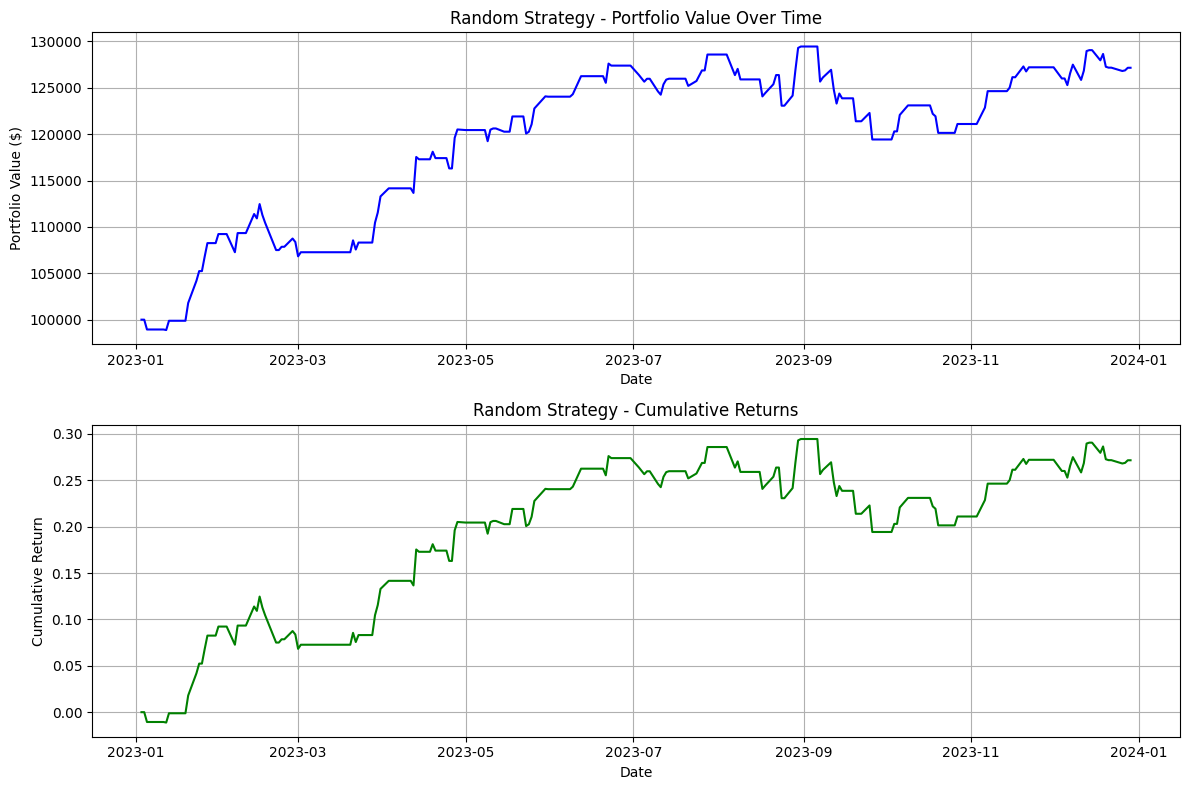

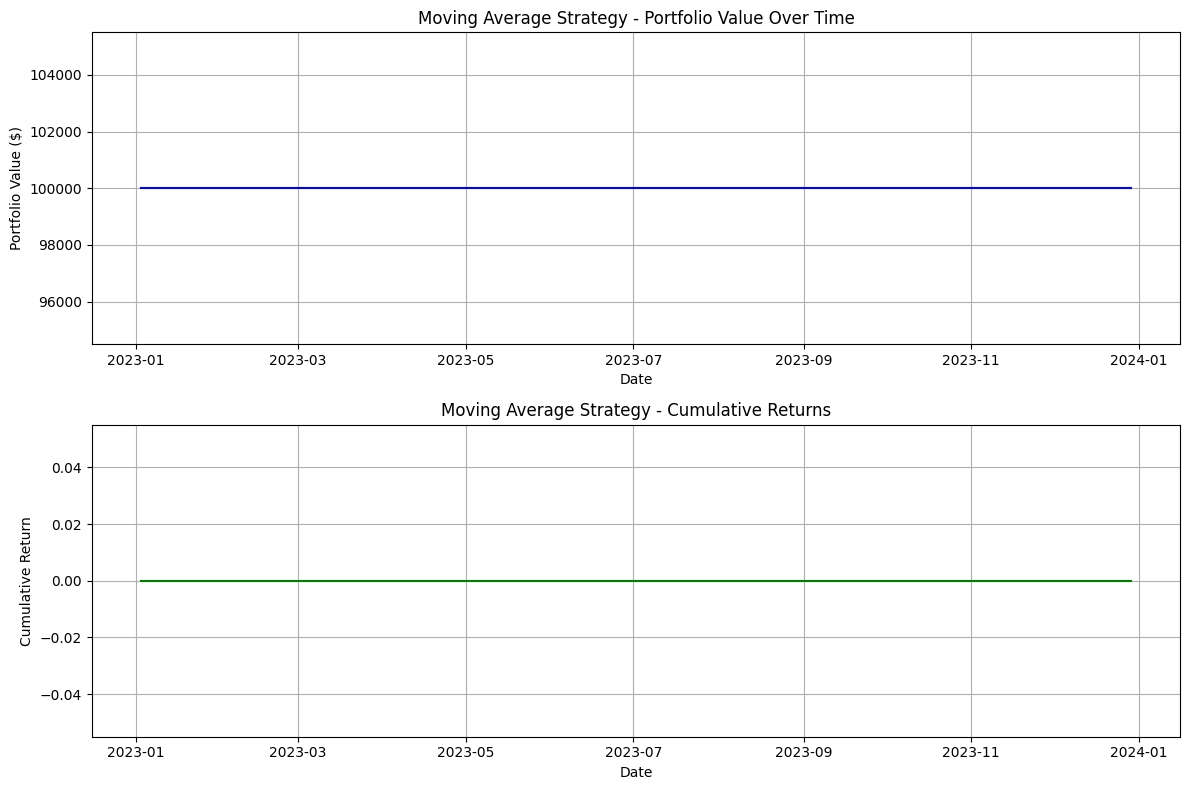

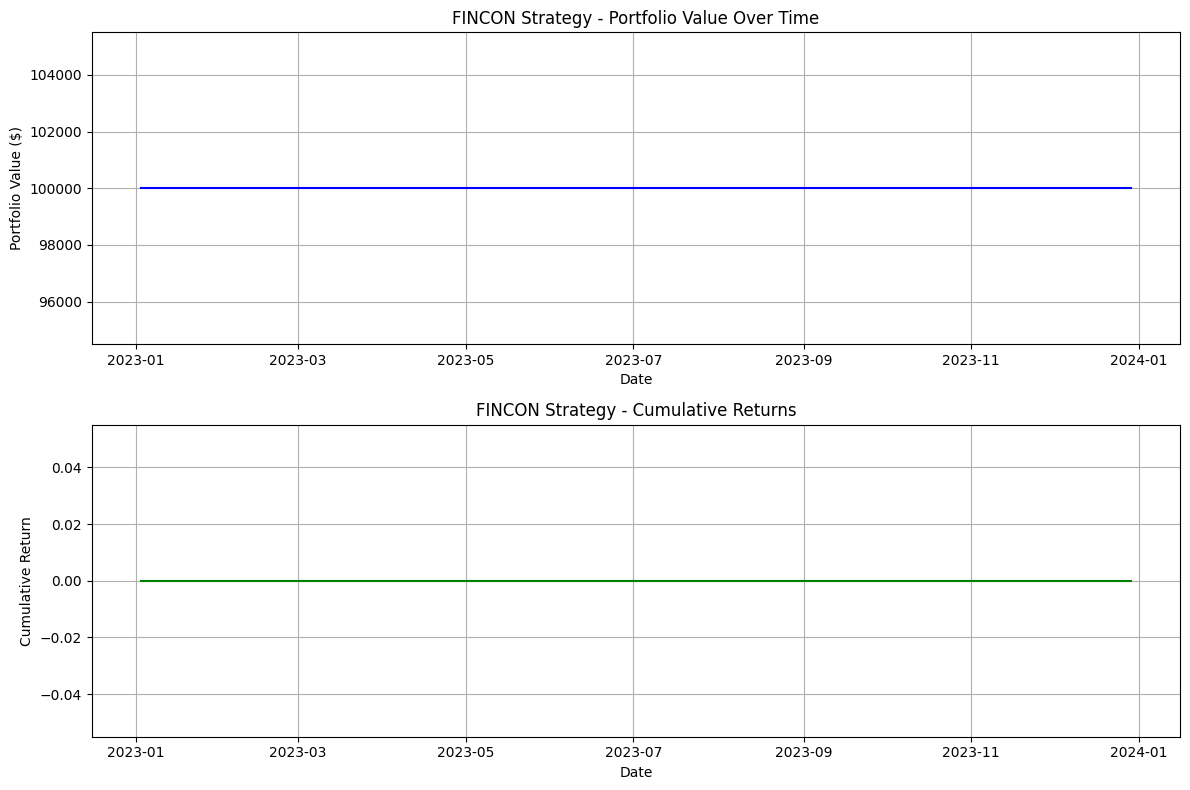

In [37]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
import openai
import re
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib
from typing import Dict, List

# Replace with your actual OpenAI API key
openai.api_key = "sk-proj-ppMoAqZfoX35JduabVIST3BlbkFJEzhAS21mxB5wMemtX5N7"

# Choose a currently available OpenAI model.  "gpt-3.5-turbo-instruct" is a good alternative.
MODEL_NAME = "gpt-3.5-turbo-instruct"

# -----------------------------------------------------------------------------
# 1. Data Sources (SEC EDGAR remains from prior code)
# -----------------------------------------------------------------------------

def get_financial_report(ticker: str, filing_type: str = '10-K', year: int = 2023) -> str:
    """
    Получает финансовые отчеты из базы данных SEC EDGAR с обходом защиты от ботов.
    """
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
        'Accept-Encoding': 'gzip, deflate'
    }

    try:
        # 1. Поиск отчетов
        base_url = "https://www.sec.gov/cgi-bin/browse-edgar"
        params = {
            'action': 'getcompany',
            'CIK': ticker,
            'type': filing_type,
            'dateb': f'{year}1231',
            'owner': 'exclude',
            'count': '100'
        }

        response = requests.get(base_url, headers=headers, params=params, timeout=10)
        response.raise_for_status()

        # 2. Парсинг страницы результатов
        soup = BeautifulSoup(response.text, 'html.parser')
        filing_link = soup.select_one('table.tableFile2 td a[href*="/Archives/edgar/data/"]')
        if not filing_link:
            return "Отчет не найден"

        # 3. Получение документа
        doc_response = requests.get(
            f"https://www.sec.gov{filing_link['href']}",
            headers=headers,
            timeout=10
        )
        doc_response.raise_for_status()

        # 4. Извлечение текста
        doc_soup = BeautifulSoup(doc_response.text, 'html.parser')
        return doc_soup.get_text(separator='\n', strip=True)[:10000]

    except requests.exceptions.RequestException as e:
        return f"Ошибка запроса: {str(e)}"
    except Exception as e:
        return f"Ошибка обработки: {str(e)}"

def get_stock_data(ticker: str, start_date: str, end_date: str) -> pd.DataFrame:
    """
    Gets historical stock data from Yahoo Finance and returns a DataFrame.
    """
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        if not data.empty:
            # Ensure the DataFrame has a DatetimeIndex
            data.index = pd.to_datetime(data.index)
            data.index.name = 'Date'
            return data
        else:
            print(f"No stock data found for {ticker} in the specified date range.")
            return None
    except Exception as e:
        print(f"Error getting stock data for {ticker}: {e}")
        return None

def get_financial_news(ticker: str, api_key: str, start_date: str, end_date: str) -> pd.DataFrame:
    """
    Gets financial news articles from News API and returns a DataFrame.
    """
    url = f"https://newsapi.org/v2/everything?q={ticker}&from={start_date}&to={end_date}&sortBy=relevancy&apiKey={api_key}"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        articles = data['articles']
        df = pd.DataFrame(articles)

        if not df.empty:
            # Select and rename columns
            df = df[['title', 'description', 'content', 'publishedAt']]
            df.rename(columns={'title': 'Title', 'description': 'Description', 'content': 'Content', 'publishedAt': 'PublishedAt'}, inplace=True)

            # Convert 'PublishedAt' to datetime
            df['PublishedAt'] = pd.to_datetime(df['PublishedAt'])

            return df
        else:
            print(f"No news articles found for {ticker} in the specified date range.")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error getting news for {ticker}: {e}")
        return None
    except KeyError:
        print(f"Error parsing news data for {ticker}: Invalid response format")
        return None

def get_earnings_call_transcript(ticker: str) -> str:
    """
    Scrapes earnings call transcripts from a website (example: Seeking Alpha).
    This is a simplified example and might need adjustments based on the website structure.
    Returns raw text.
    """
    url = f"https://seekingalpha.com/symbol/{ticker}/earnings/transcripts"  # Example URL structure
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        # Example: Find the transcript content (adjust based on actual HTML structure)
        transcript_div = soup.find('div', class_='article-body')  # Replace with actual class
        if transcript_div:
            transcript = transcript_div.get_text(separator='\n', strip=True)
            return transcript
        else:
            return "Transcript not found on the page."

    except requests.exceptions.RequestException as e:
        print(f"Error getting earnings call transcript for {ticker}: {e}")
        return "Error fetching transcript."
    except Exception as e:
        print(f"Error processing earnings call transcript for {ticker}: {e}")
        return "Error processing transcript."

def get_alpaca_news(ticker: str, alpaca_api_key: str, alpaca_secret_key: str, start_date: str, end_date: str) -> pd.DataFrame:
    """
    Gets news articles from the Alpaca News API and returns a DataFrame.
    """
    url = "https://data.alpaca.markets/v1beta1/news"
    headers = {
        "APCA-API-KEY-ID": alpaca_api_key,
        "APCA-API-SECRET-KEY": alpaca_secret_key
    }
    params = {
        "symbols": ticker,
        "start": start_date,
        "end": end_date
    }

    try:
        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()
        news_data = response.json()

        articles = news_data.get('news', [])  # Safely get the 'news' list
        df = pd.DataFrame(articles)

        if not df.empty:
            # Select and rename columns
            df = df[['headline', 'summary', 'created_at', 'source']]
            df.rename(columns={'headline': 'Title', 'summary': 'Description', 'created_at': 'PublishedAt', 'source': 'Source'}, inplace=True)

            # Convert 'PublishedAt' to datetime
            df['PublishedAt'] = pd.to_datetime(df['PublishedAt'])
            return df
        else:
            print(f"No Alpaca news found for {ticker} in the specified date range.")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error getting Alpaca news for {ticker}: {e}")
        return None
    except (KeyError, TypeError) as e:
        print(f"Error parsing Alpaca news data for {ticker}: {e}")
        return None

# -----------------------------------------------------------------------------
# 2. Analyst Agents
# -----------------------------------------------------------------------------

class DataAnalysisAnalyst:
    """
    Computes financial metrics from tabular time series data.
    """
    def __init__(self):
        self.name = "DataAnalysisAnalyst"
        self.description = "Computes financial metrics from tabular time series data."

    def analyze(self, time_series_data: pd.DataFrame) -> dict:  # Return a dict
        """
        Computes momentum from the time series data.
        """
        try:
            # Calculate momentum (example: 3-month momentum)
            momentum = self.calculate_momentum(time_series_data['Close'], window=60)  # Roughly 3 months
            return {"momentum": momentum} # Return as a dictionary
        except Exception as e:
            print(f"Error analyzing time series data: {e}")
            return {"momentum": None} # Return None if there's an error

    def calculate_momentum(self, prices: pd.Series, window: int) -> float:
        """
        Calculates momentum over a given window.
        """
        if len(prices) < window:
            return 0.0  # Not enough data

        return prices.iloc[-1] / prices.iloc[-window] - 1

class NewsSentimentAnalyst:
    """
    Analyzes news articles and extracts sentiment using OpenAI.
    """
    def __init__(self):
        self.name = "NewsSentimentAnalyst"
        self.description = "Extracts sentiment from news articles using OpenAI."

    def analyze(self, news_headline: str) -> float:
        """
        Analyzes the news headline and returns a sentiment score (-1 to 1).
        """
        try:
            response = openai.completions.create(
                model=MODEL_NAME,  # Use the chosen model
                prompt=f"What is the sentiment of this news headline: {news_headline}? Answer strictly with one of these words: Positive, Negative, or Neutral.",
                max_tokens=10,  # Reduced max_tokens
                n=1,
                stop=None,
                temperature=0.2,
            )
            sentiment_text = response.choices[0].text.strip().lower()

            if "positive" in sentiment_text:
                return 1.0
            elif "negative" in sentiment_text:
                return -1.0
            else:
                return 0.0 # Neutral
        except Exception as e:
            print(f"Error analyzing sentiment: {e}")
            return 0.0  # Default to neutral on error

class FilingAnalysisAgent:
    """
    Analyzes 10-Q/10-K filings and extracts key information.
    """
    def __init__(self):
        self.name = "FilingAnalysisAgent"
        self.description = "Extracts key information from 10-Q/10-K filings using LLMs."

    def analyze(self, filing_text: str) -> Dict[str, str]:
        """
        Analyzes the filing text and returns key information in a dictionary.
        """
        try:
            # 1. Extract Key Financial Metrics (Example)
            revenue = self.extract_financial_metric(filing_text, "Revenue")
            net_income = self.extract_financial_metric(filing_text, "Net Income")

            # 2. Extract Management Discussion (Example)
            management_discussion = self.extract_management_discussion(filing_text)

            # 3. Extract Risk Factors (Example)
            risk_factors = self.extract_risk_factors(filing_text)

            return {
                "Revenue": revenue,
                "Net Income": net_income,
                "Management Discussion": management_discussion,
                "Risk Factors": risk_factors,
            }

        except Exception as e:
            print(f"Error analyzing filing: {e}")
            return {}

    def extract_financial_metric(self, filing_text: str, metric_name: str) -> str:
        """
        Extracts a specific financial metric from the filing text using LLMs.
        """
        try:
            response = openai.completions.create(
                model=MODEL_NAME,
                prompt=f"Extract the value of {metric_name} from the following financial report:\n\n{filing_text}\n\nValue:",
                max_tokens=50,
                n=1,
                stop=None,
                temperature=0.3,
            )
            return response.choices[0].text.strip()
        except Exception as e:
            print(f"Error extracting {metric_name}: {e}")
            return "N/A"

    def extract_management_discussion(self, filing_text: str) -> str:
          """
          Extracts key points from the Management Discussion and Analysis (MD&A) section.
          """
          try:
              response = openai.completions.create(
                  model=MODEL_NAME,
                  prompt=f"Summarize the key points from the Management Discussion and Analysis (MD&A) section of the following financial report:\n\n{filing_text}\n\nSummary:",
                  max_tokens=200,
                  n=1,
                  stop=None,
                  temperature=0.4,
              )
              return response.choices[0].text.strip()
          except Exception as e:
              print(f"Error extracting MD&A: {e}")
              return "N/A"

    def extract_risk_factors(self, filing_text: str) -> str:
        """
        Identifies and lists the key risk factors discussed in the filing.
        """
        try:
            response = openai.completions.create(
                model=MODEL_NAME,
                prompt=f"List the key risk factors discussed in the following financial report:\n\n{filing_text}\n\nRisk Factors:",
                max_tokens=150,
                n=1,
                stop=None,
                temperature=0.3,
            )
            return response.choices[0].text.strip()
        except Exception as e:
            print(f"Error extracting risk factors: {e}")
            return "N/A"

# -----------------------------------------------------------------------------
# 3. Trading Strategies
# -----------------------------------------------------------------------------

def random_trading_strategy(data: pd.DataFrame) -> pd.DataFrame:
    """
    A random trading strategy for comparison.
    """
    signals = np.random.choice([-1, 0, 1], size=len(data)) # -1: sell, 0: hold, 1: buy
    data['Signal'] = signals
    return data

def moving_average_strategy(data: pd.DataFrame, short_window: int, long_window: int) -> pd.DataFrame:
    """
    A simple moving average crossover strategy.
    """
    data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window).mean()
    data['Signal'] = 0.0
    data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1.0, 0.0)
    data['Position'] = data['Signal'].diff()
    return data

def fincon_trading_strategy(data: pd.DataFrame, momentum: float, news_sentiment: float) -> pd.DataFrame:
    """
    A simplified FINCON trading strategy that uses momentum and news sentiment.
    """
    data['Signal'] = 0.0  # Default to hold

    # Combine momentum and sentiment
    if momentum is not None and news_sentiment is not None:
        # Create a combined signal Series with the same index as the data DataFrame
        combined_signal = pd.Series(momentum + news_sentiment, index=data.index) # Changed this line!

        # Use .loc to set the 'Signal' column based on the combined_signal
        data.loc[combined_signal > 0.2, 'Signal'] = 1  # Buy
        data.loc[combined_signal < -0.2, 'Signal'] = -1  # Sell

    return data

# -----------------------------------------------------------------------------
# 4. Performance Evaluation
# -----------------------------------------------------------------------------

def evaluate_strategy(data: pd.DataFrame, initial_capital: float = 100000) -> dict:
    """
    Evaluates the performance of a trading strategy.
    """
    # Initialize positions and portfolio DataFrames
    positions = pd.DataFrame(index=data.index, data={'Holdings': np.zeros(len(data))})
    portfolio = pd.DataFrame(index=data.index, data={'Cash': np.zeros(len(data)), 'Total': np.zeros(len(data))})

    # Set initial portfolio values
    portfolio['Cash'].iloc[0] = initial_capital
    portfolio['Total'].iloc[0] = initial_capital

    # Add a 'Shares' column
    data['Shares'] = 0

    shares = 0
    cumulative_returns = [0.0]  # Initialize cumulative returns list
    for i in range(1, len(data)):
        signal = data['Signal'].iloc[i]
        closing_price = data['Close'].iloc[i]

        if signal == 1:  # Buy
            shares_to_buy = int(portfolio['Cash'].iloc[i-1] / closing_price)
            shares += shares_to_buy
            portfolio['Cash'].iloc[i] = portfolio['Cash'].iloc[i-1] - shares_to_buy * closing_price
            data['Shares'].iloc[i] = shares_to_buy  # Record the number of shares bought
        elif signal == -1: # Sell
            portfolio['Cash'].iloc[i] = portfolio['Cash'].iloc[i-1] + shares * closing_price
            shares = 0
            data['Shares'].iloc[i] = -shares # Record selling all shares (negative value)
        else: # Hold
            portfolio['Cash'].iloc[i] = portfolio['Cash'].iloc[i-1]

        positions['Holdings'].iloc[i] = shares * closing_price
        portfolio['Total'].iloc[i] = portfolio['Cash'].iloc[i] + positions['Holdings'].iloc[i]

        # Calculate cumulative return
        cumulative_return = (portfolio['Total'].iloc[i] - initial_capital) / initial_capital
        cumulative_returns.append(cumulative_return)

    returns = portfolio['Total'].pct_change()
    sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std()) if returns.std() > 0 else 0

    # Calculate drawdown
    peak = portfolio['Total'].expanding().max()
    drawdown = (portfolio['Total'] - peak) / peak
    max_drawdown = drawdown.min()

    final_portfolio_value = portfolio['Total'].iloc[-1]
    profit = final_portfolio_value - initial_capital

    # Add cumulative returns to the results dictionary
    results = {
        'Final Portfolio Value': final_portfolio_value,
        'Profit': profit,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown,
        'Portfolio': portfolio, # Return the portfolio DataFrame
        'Data': data, # Return the trading data DataFrame
        'Cumulative Returns': cumulative_returns  # Added cumulative returns
    }
    return results

# -----------------------------------------------------------------------------
# 5. Plotting Function
# -----------------------------------------------------------------------------

def plot_trading_results(strategy_name: str, results: dict):
    """
    Plots the portfolio value and cumulative returns for a given trading strategy.
    """
    portfolio = results['Portfolio']
    data = results['Data']
    cumulative_returns = results['Cumulative Returns'] # Get the returns

    # Create figure and axes
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

    # Plot portfolio value
    axes[0].plot(portfolio['Total'], label=strategy_name, color='blue')
    axes[0].set_title(f'{strategy_name} - Portfolio Value Over Time')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Portfolio Value ($)')
    axes[0].grid(True)

    # Plot cumulative returns
    axes[1].plot(data.index, cumulative_returns, label=strategy_name, color='green')  # Fixed line here
    axes[1].set_title(f'{strategy_name} - Cumulative Returns')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Cumulative Return')
    axes[1].grid(True)

    # Add trade markers to portfolio value plot
    for i in range(1, len(data)):
        if data['Shares'].iloc[i] != 0:  # If a trade occurred
            axes[0].axvline(x=data.index[i], color='red', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------------------------
# 6. Main Execution
# -----------------------------------------------------------------------------

if __name__ == "__main__":
    # Define the ticker and date range
    ticker = "AAPL"
    start_date = "2023-01-01"
    end_date = "2024-01-01"

    # 1. Get stock data
    stock_data = get_stock_data(ticker, start_date, end_date)
    if stock_data is not None:
        print(f"Stock Data for {ticker}:\n", stock_data.head())

        # 2. Get financial news
        news_api_key = "fb63178174ab47459a26782d7f798d0e"
        news_articles = get_financial_news(ticker, news_api_key, start_date, end_date)

        # 3. Get 10K filing
        filing_agent = FilingAnalysisAgent()
        filing_text = get_financial_report(ticker, filing_type='10-K', year=2023)

        # 4. Analyze the filing
        filing_data = filing_agent.analyze(filing_text)
        print(f"Filing Data: {filing_data}")

        # 5. Data Analysis with DataAnalysisAnalyst
        data_analysis_analyst = DataAnalysisAnalyst()
        analysis_result = data_analysis_analyst.analyze(stock_data)
        momentum = analysis_result["momentum"] # Extract momentum
        print(f"Momentum: {momentum}")

        # 6. News Sentiment Analysis
        news_sentiment = 0.0  # Default
        if news_articles is not None and not news_articles.empty:
            news_sentiment_analyst = NewsSentimentAnalyst()
            #  For simplicity, use sentiment of the *latest* article.  A more robust approach would average over multiple articles.
            news_sentiment = news_sentiment_analyst.analyze(news_articles['Title'].iloc[-1])  # Analyze the latest headline
            print(f"News Sentiment: {news_sentiment}")

        # 7. Implement Trading Strategies
        # a. Random Trading Strategy
        random_data = stock_data.copy()
        random_data = random_trading_strategy(random_data)

        # b. Moving Average Strategy
        ma_data = stock_data.copy()
        ma_data = moving_average_strategy(ma_data, short_window=20, long_window=50)

        # c. FINCON (Simplified)
        fincon_data = stock_data.copy()
        fincon_data = fincon_trading_strategy(fincon_data, momentum, news_sentiment)

        # 8. Evaluate Strategies
        print("\nEvaluating Random Trading Strategy:")
        random_results = evaluate_strategy(random_data)
        print(random_results)

        print("\nEvaluating Moving Average Strategy:")
        ma_results = evaluate_strategy(ma_data)
        print(ma_results)

        print("\nEvaluating FINCON (Simplified) Strategy:")
        fincon_results = evaluate_strategy(fincon_data)
        print(fincon_results)

        # 9. Plot Results
        plot_trading_results("Random Strategy", random_results)
        plot_trading_results("Moving Average Strategy", ma_results)
        plot_trading_results("FINCON Strategy", fincon_results)
